In [88]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.metrics import roc_curve, auc, mean_squared_error, roc_auc_score, mean_absolute_error
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedKFold

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Ridge

from sklearn.metrics import r2_score, mean_squared_error

import category_encoders as ce
from category_encoders import WOEEncoder

In [3]:
new_df = pd.read_csv('new_df.csv')

In [4]:
new_df.head()

,Unnamed: 0,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Deal-Status,Year,Status
0,0,Chevrolet,2018 Chevrolet Traverse Premier,53969,Nan,2,35854,Great Deal | $2831 under,2018,Great
1,1,Ford,2018 Ford Edge SEL,35115,4.5,23,28592,Good Deal | $497 under,2018,Good
2,2,Kia,2022 Kia Carnival SX Prestige,26630,Nan,3,50668,Great Deal | $3880 under,2022,Great
3,3,Acura,2020 Acura TLX V6 Advance,19097,5.0,359,39958,Good Deal,2020,Good
4,4,Volkswagen,2016 Volkswagen Touareg TDI Lux,64426,4.4,313,31586,Great Deal | $3917 under,2016,Great


In [5]:
new_df.columns

Index(['Unnamed: 0', 'Name', 'Vehicle_details', 'Mileage', 'Rating',
       'Rating-Count', 'Price', 'Deal-Status', 'Year', 'Status'],
      dtype='object')

In [6]:
new_df.drop(columns = ['Unnamed: 0','Deal-Status'], inplace = True)

In [7]:
new_df.head()

,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Year,Status
0,Chevrolet,2018 Chevrolet Traverse Premier,53969,Nan,2,35854,2018,Great
1,Ford,2018 Ford Edge SEL,35115,4.5,23,28592,2018,Good
2,Kia,2022 Kia Carnival SX Prestige,26630,Nan,3,50668,2022,Great
3,Acura,2020 Acura TLX V6 Advance,19097,5.0,359,39958,2020,Good
4,Volkswagen,2016 Volkswagen Touareg TDI Lux,64426,4.4,313,31586,2016,Great


In [8]:
new_df.shape

(10122, 8)

In [9]:
new_df.drop_duplicates(inplace = True)

In [10]:
new_df

,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Year,Status
0,Chevrolet,2018 Chevrolet Traverse Premier,53969,Nan,2,35854,2018,Great
1,Ford,2018 Ford Edge SEL,35115,4.5,23,28592,2018,Good
2,Kia,2022 Kia Carnival SX Prestige,26630,Nan,3,50668,2022,Great
3,Acura,2020 Acura TLX V6 Advance,19097,5.0,359,39958,2020,Good
4,Volkswagen,2016 Volkswagen Touareg TDI Lux,64426,4.4,313,31586,2016,Great
...,...,...,...,...,...,...,...,...
10117,Kia,2018 Kia Forte LX,39169,4.8,2765,21000,2018,Fair
10118,GMC,2021 GMC Acadia SLE,13968,4.6,25,28600,2021,Good
10119,Chevrolet,2020 Chevrolet Traverse LT Leather,24085,3.4,894,36988,2020,Great
10120,Dodge,2020 Dodge Durango SXT,34474,3.0,888,31995,2020,Good


In [11]:
columns = ['Name','Vehicle_details','Mileage','Rating','Rating-Count','Year','Status']

In [12]:
new_df[new_df['Status'] == 'Nan']

,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Year,Status


In [13]:
new_df.drop(new_df[(new_df['Mileage'] == 'Nan') | (new_df['Rating'] == 'Nan') | (new_df['Rating-Count'] == 'Nan')].index, inplace=True)


In [14]:
new_df[new_df['Rating-Count'] == 'Nan']

,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Year,Status


In [15]:
new_df

,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Year,Status
1,Ford,2018 Ford Edge SEL,35115,4.5,23,28592,2018,Good
3,Acura,2020 Acura TLX V6 Advance,19097,5.0,359,39958,2020,Good
4,Volkswagen,2016 Volkswagen Touareg TDI Lux,64426,4.4,313,31586,2016,Great
5,Toyota,2022 Toyota Corolla Cross LE,1754,4.6,1243,35000,2022,Great
6,BMW,2019 BMW 540 i,13044,4.5,363,45495,2019,Good
...,...,...,...,...,...,...,...,...
10117,Kia,2018 Kia Forte LX,39169,4.8,2765,21000,2018,Fair
10118,GMC,2021 GMC Acadia SLE,13968,4.6,25,28600,2021,Good
10119,Chevrolet,2020 Chevrolet Traverse LT Leather,24085,3.4,894,36988,2020,Great
10120,Dodge,2020 Dodge Durango SXT,34474,3.0,888,31995,2020,Good


In [16]:
new_df = new_df[new_df['Price'] != 'Not Priced']

In [17]:
new_df.head()

,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Year,Status
1,Ford,2018 Ford Edge SEL,35115,4.5,23,28592,2018,Good
3,Acura,2020 Acura TLX V6 Advance,19097,5.0,359,39958,2020,Good
4,Volkswagen,2016 Volkswagen Touareg TDI Lux,64426,4.4,313,31586,2016,Great
5,Toyota,2022 Toyota Corolla Cross LE,1754,4.6,1243,35000,2022,Great
6,BMW,2019 BMW 540 i,13044,4.5,363,45495,2019,Good


In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8929 entries, 1 to 10121
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             8929 non-null   object
 1   Vehicle_details  8929 non-null   object
 2   Mileage          8929 non-null   object
 3   Rating           8929 non-null   object
 4   Rating-Count     8929 non-null   object
 5   Price            8929 non-null   object
 6   Year             8929 non-null   int64 
 7   Status           8929 non-null   object
dtypes: int64(1), object(7)
memory usage: 627.8+ KB


In [19]:
new_df['Mileage'] = new_df['Mileage'].astype(int)
new_df['Rating'] = new_df['Rating'].astype(float)
new_df['Rating-Count'] = new_df['Rating-Count'].astype(int)





<ipython-input-19-3b7fe51adb5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Mileage'] = new_df['Mileage'].astype(int)
<ipython-input-19-3b7fe51adb5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Rating'] = new_df['Rating'].astype(float)
<ipython-input-19-3b7fe51adb5a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [20]:
new_df['Price'] = new_df['Price'].astype(float)

<ipython-input-20-521e3ad7774e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Price'] = new_df['Price'].astype(float)


In [21]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8929 entries, 1 to 10121
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8929 non-null   object 
 1   Vehicle_details  8929 non-null   object 
 2   Mileage          8929 non-null   int64  
 3   Rating           8929 non-null   float64
 4   Rating-Count     8929 non-null   int64  
 5   Price            8929 non-null   float64
 6   Year             8929 non-null   int64  
 7   Status           8929 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 627.8+ KB


In [22]:
new_df.head()

,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Year,Status
1,Ford,2018 Ford Edge SEL,35115,4.5,23,28592.0,2018,Good
3,Acura,2020 Acura TLX V6 Advance,19097,5.0,359,39958.0,2020,Good
4,Volkswagen,2016 Volkswagen Touareg TDI Lux,64426,4.4,313,31586.0,2016,Great
5,Toyota,2022 Toyota Corolla Cross LE,1754,4.6,1243,35000.0,2022,Great
6,BMW,2019 BMW 540 i,13044,4.5,363,45495.0,2019,Good


In [23]:
yr = new_df['Year'].iloc[:8937]

In [24]:
yr

1        2018
3        2020
4        2016
5        2022
6        2019
         ... 
10117    2018
10118    2021
10119    2020
10120    2020
10121    2020
Name: Year, Length: 8929, dtype: int64

In [25]:
car = new_df['Name'].iloc[:8937]

In [26]:
for n in yr:
    #for m in car:
    
        new_df['details'] =  new_df['Vehicle_details'].apply(lambda x : x.strip(str(n)))

<ipython-input-26-5bc7cf78f20b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['details'] =  new_df['Vehicle_details'].apply(lambda x : x.strip(str(n)))


In [27]:
new_df.head()

,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Year,Status,details
1,Ford,2018 Ford Edge SEL,35115,4.5,23,28592.0,2018,Good,18 Ford Edge SEL
3,Acura,2020 Acura TLX V6 Advance,19097,5.0,359,39958.0,2020,Good,Acura TLX V6 Advance
4,Volkswagen,2016 Volkswagen Touareg TDI Lux,64426,4.4,313,31586.0,2016,Great,16 Volkswagen Touareg TDI Lux
5,Toyota,2022 Toyota Corolla Cross LE,1754,4.6,1243,35000.0,2022,Great,Toyota Corolla Cross LE
6,BMW,2019 BMW 540 i,13044,4.5,363,45495.0,2019,Good,19 BMW 540 i


In [28]:
new_df['details'].value_counts()

 RAM 1500 Big Horn                          64
 Ford F-150 XLT                             60
1 RAM 1500 Big Horn                         46
 Toyota Tundra SR5                          42
 BMW X7 xDrive40i                           32
                                            ..
 Porsche 911 Carrera 4                       1
19 Subaru WRX S209                           1
18 Chrysler Pacifica Touring-L               1
19 Volkswagen Atlas 2.0T SE w/Technology     1
18 Kia Forte LX                              1
Name: details, Length: 2878, dtype: int64

In [29]:
new_df['model_details'] = new_df['details'].str.replace('1 RAM 1500 Big Horn', ' RAM 1500 Big Horn')

<ipython-input-29-44bf0b82a99e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['model_details'] = new_df['details'].str.replace('1 RAM 1500 Big Horn', ' RAM 1500 Big Horn')


In [30]:
new_df['model_details'].value_counts()

 RAM 1500 Big Horn                          110
 Ford F-150 XLT                              60
 Toyota Tundra SR5                           42
 BMW X7 xDrive40i                            32
 Ford Explorer XLT                           31
                                           ... 
 Porsche 911 Carrera 4                        1
19 Subaru WRX S209                            1
18 Chrysler Pacifica Touring-L                1
19 Volkswagen Atlas 2.0T SE w/Technology      1
18 Kia Forte LX                               1
Name: model_details, Length: 2876, dtype: int64

In [31]:
new_df.head()

,Name,Vehicle_details,Mileage,Rating,Rating-Count,Price,Year,Status,details,model_details
1,Ford,2018 Ford Edge SEL,35115,4.5,23,28592.0,2018,Good,18 Ford Edge SEL,18 Ford Edge SEL
3,Acura,2020 Acura TLX V6 Advance,19097,5.0,359,39958.0,2020,Good,Acura TLX V6 Advance,Acura TLX V6 Advance
4,Volkswagen,2016 Volkswagen Touareg TDI Lux,64426,4.4,313,31586.0,2016,Great,16 Volkswagen Touareg TDI Lux,16 Volkswagen Touareg TDI Lux
5,Toyota,2022 Toyota Corolla Cross LE,1754,4.6,1243,35000.0,2022,Great,Toyota Corolla Cross LE,Toyota Corolla Cross LE
6,BMW,2019 BMW 540 i,13044,4.5,363,45495.0,2019,Good,19 BMW 540 i,19 BMW 540 i


In [32]:
features = ['Mileage','Rating','Rating-Count','Year','Price','Name','Status','model_details']
final_df = new_df[features]

In [120]:
final_df.head()

,Mileage,Rating,Rating-Count,Year,Price,Name,Status,model_details
1,35115,4.5,23,2018,28592.0,Ford,Good,18 Ford Edge SEL
3,19097,5.0,359,2020,39958.0,Acura,Good,Acura TLX V6 Advance
4,64426,4.4,313,2016,31586.0,Volkswagen,Great,16 Volkswagen Touareg TDI Lux
5,1754,4.6,1243,2022,35000.0,Toyota,Great,Toyota Corolla Cross LE
6,13044,4.5,363,2019,45495.0,BMW,Good,19 BMW 540 i


In [121]:
final_df.shape

(8929, 8)

In [118]:
#final_df.to_csv('cars_model.csv')

In [34]:
heat_mp = final_df.corr()

<ipython-input-34-9aa4a1c182dc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heat_mp = final_df.corr()


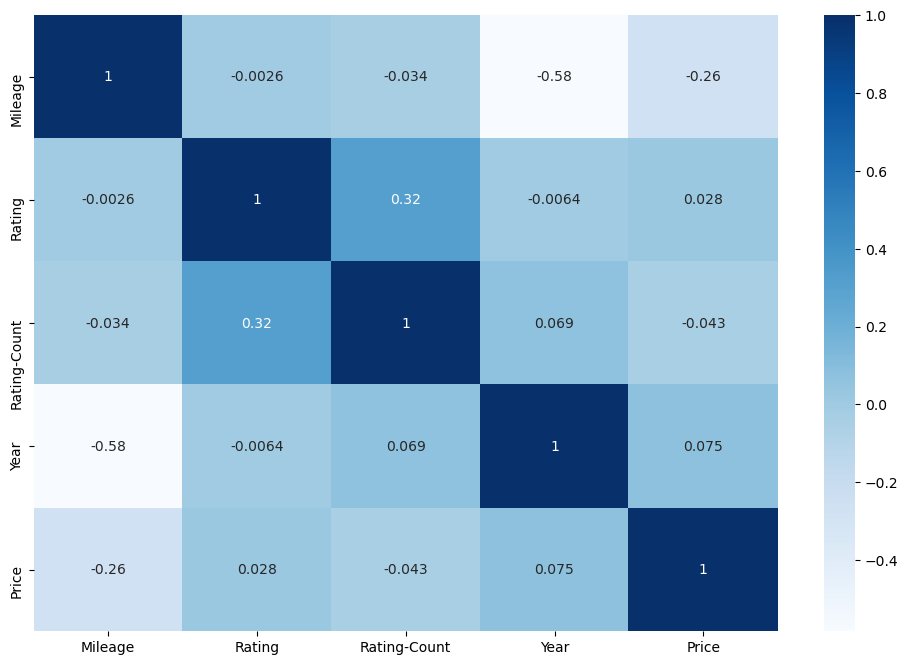

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(heat_mp,annot=True, cmap="Blues")
plt.show()

## Modelling

In [36]:
numerical = ['Mileage','Rating','Rating-Count','Year','Price']
categorical = ['Name','Status','model_details']

## Base Model

### Define the target variables and the predictors

In [37]:
X = final_df.drop(columns=['Price'])
y= final_df['Price']

## Doing Train-Test-Split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)


In [39]:
X_train.shape

(6250, 7)

In [40]:
y_train.shape

(6250,)

In [41]:
X_test.shape

(2679, 7)

In [42]:
y_test.shape

(2679,)

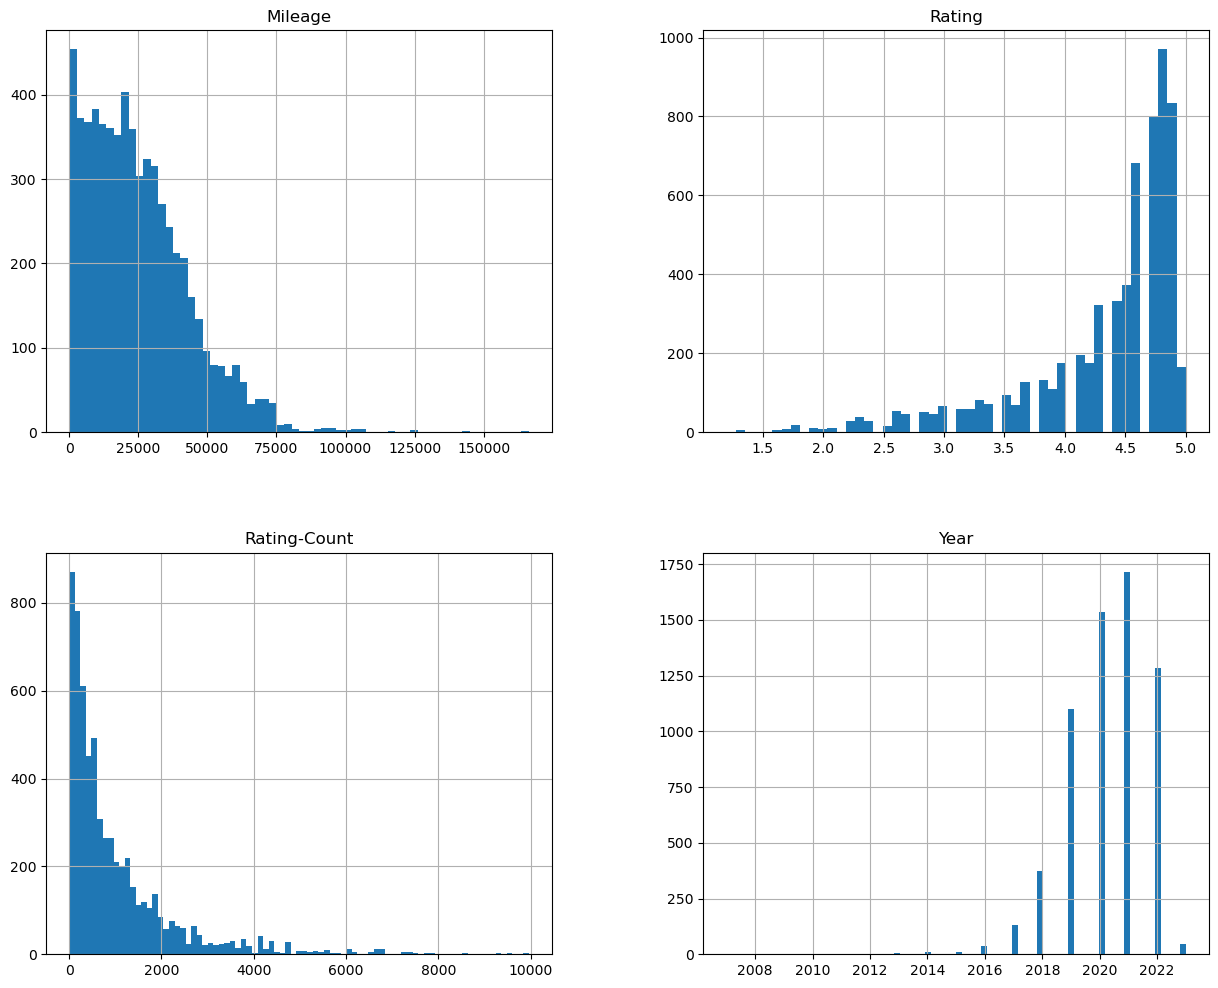

In [43]:
# check distribution of features
X_train.hist(figsize = [15,12], bins = 'auto')
plt.show()

### Defining the seperate pipelines for numeric and categorical features

In [44]:
numeric_pipeline = Pipeline([#('numimputer', SimpleImputer(strategy = 'mean')), 
                             ('numnorm', StandardScaler())])
categorical_pipeline = Pipeline([#('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False, handle_unknown = 'ignore')),
    ('onehotnorm', MaxAbsScaler())])

In [45]:
num_cols = X_train.select_dtypes(['int', 'float']).columns
cat_cols = X_train.select_dtypes(['object']).columns

In [46]:
ct = ColumnTransformer(
    [("categorical_pipeline", categorical_pipeline, cat_cols),
     ("numeric_pipeline", numeric_pipeline, num_cols)])

In [47]:
ct

ColumnTransformer(transformers=[('categorical_pipeline',
                                 Pipeline(steps=[('onehotenc',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False)),
                                                 ('onehotnorm',
                                                  MaxAbsScaler())]),
                                 Index(['Name', 'Status', 'model_details'], dtype='object')),
                                ('numeric_pipeline',
                                 Pipeline(steps=[('numnorm',
                                                  StandardScaler())]),
                                 Index(['Mileage', 'Rating', 'Rating-Count', 'Year'], dtype='object'))])

### Viewing the transformed data

In [48]:
md_xtrain = pd.DataFrame(ct.fit_transform(X_train))

In [49]:
md_xtrain

,0,1,2,3,4,5,6,7,8,9,...,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.081324,-0.520467,-0.680191,-0.922249
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.069473,0.690033,-0.219074,-0.210110
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.589037,0.538721,-0.563132,0.502030
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.387727,0.387408,0.118657,1.214169
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.429391,0.841346,1.553420,-0.210110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.032404,-0.671779,-0.550477,0.502030
6246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.311685,0.841346,0.921460,1.214169
6247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.472202,-2.790154,-0.747421,-0.210110
6248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.287413,0.236096,0.221479,-0.210110


### Base model Ridge regression

In [50]:
ridge_pipeline = Pipeline([('preprocess', ct),
                      ('model',
                       Ridge(random_state = 44))])

In [51]:
ridge_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['Name', 'Status', 'model_details'], dtype='object')),
                                                 ('numeric_pipeline',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['Mileage', 'Rating', 'Rating-Count', 'Yea

### Fit the model pipeline

In [52]:
ridge_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['Name', 'Status', 'model_details'], dtype='object')),
                                                 ('numeric_pipeline',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['Mileage', 'Rating', 'Rating-Count', 'Yea

In [53]:
y_pred = ridge_pipeline.predict(X_test)

In [54]:
ridge_pipeline.score(X_test,y_test)

0.8732950380390421

In [55]:
ridge_pipeline.score(X_train,y_train)

0.9549554808144894

In [56]:
RMSE = mean_squared_error(y_test, y_pred, squared = False)


In [57]:
RMSE

11773.116414493952

In [58]:
MSE = mean_squared_error(y_test, y_pred)

In [59]:
MSE

138606270.1092269

In [60]:
MAE = mean_absolute_error(y_test, y_pred)

In [61]:
MAE

6422.105265684749

In [62]:
R2 = r2_score(y_test,y_pred)

In [63]:
R2

0.8732950380390421

In [84]:
columns_log = ['MSE', 'MAE', 'RMSE', 'r2_score']



MSE_ridge = [138606270.10]
MAE_ridge = [6422.10]
RMSE_ridge = [11773.11]
R2_ridge = [0.87]
combined_metrics_log = list(zip( MSE_ridge, MAE_ridge,
                                RMSE_ridge, R2_ridge ))
compiled_log_df = pd.DataFrame(combined_metrics_log, columns=columns_log)
print('Ridge Metrics:')
compiled_log_df

Ridge Metrics:


,MSE,MAE,RMSE,r2_score
0,138606270.1,6422.1,11773.11,0.87


## Hyperparameter tuning

In [65]:
ridge_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocess', 'model', 'preprocess__n_jobs', 'preprocess__remainder', 'preprocess__sparse_threshold', 'preprocess__transformer_weights', 'preprocess__transformers', 'preprocess__verbose', 'preprocess__categorical_pipeline', 'preprocess__numeric_pipeline', 'preprocess__categorical_pipeline__memory', 'preprocess__categorical_pipeline__steps', 'preprocess__categorical_pipeline__verbose', 'preprocess__categorical_pipeline__onehotenc', 'preprocess__categorical_pipeline__onehotnorm', 'preprocess__categorical_pipeline__onehotenc__categories', 'preprocess__categorical_pipeline__onehotenc__drop', 'preprocess__categorical_pipeline__onehotenc__dtype', 'preprocess__categorical_pipeline__onehotenc__handle_unknown', 'preprocess__categorical_pipeline__onehotenc__sparse', 'preprocess__categorical_pipeline__onehotnorm__copy', 'preprocess__numeric_pipeline__memory', 'preprocess__numeric_pipeline__steps', 'preprocess__numeric_pipeline__verbose', 'preprocess__numer

In [97]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [98]:
space = dict()
space['model__solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['model__alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['model__fit_intercept'] = [True, False]
space['model__normalize'] = [True, False]



clf = GridSearchCV(ridge_pipeline,space, scoring='r2', n_jobs=-1, cv=5)

In [99]:
result = clf.fit(X_train, y_train)


/Users/karankurdia/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [100]:
result.best_score_

0.8482118952899917

In [101]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8482118952899917
Best Hyperparameters: {'model__alpha': 0.1, 'model__fit_intercept': False, 'model__normalize': True, 'model__solver': 'sag'}


### Getting the best model

In [102]:
best_model = result.best_estimator_
best_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['Name', 'Status', 'model_details'], dtype='object')),
                                                 ('numeric_pipeline',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['Mileage', 'Rating', 'Rating-Count', 'Yea

In [103]:
y_pred_1 = best_model.predict(X_test)

In [104]:
RMSE = mean_squared_error(y_test, y_pred_1, squared = False)

In [105]:
RMSE

11013.077603082347

In [106]:
MSE = mean_squared_error(y_test, y_pred_1)

In [107]:
MSE

121287878.29151402

In [108]:
MAE = mean_absolute_error(y_test, y_pred_1)

In [109]:
MAE

5281.402535275492

In [110]:
R2 = r2_score(y_test,y_pred_1)

In [111]:
R2

0.8891264010413006

In [112]:
columns_log = ['MSE', 'MAE', 'RMSE', 'r2_score']



MSE_ridge = [121287878.2]
MAE_ridge = [5281.40]
RMSE_ridge = [11013.077]
R2_ridge = [0.889]
combined_metrics_log = list(zip( MSE_ridge, MAE_ridge,
                                RMSE_ridge, R2_ridge ))
compiled_log_df = pd.DataFrame(combined_metrics_log, columns=columns_log)
print('Ridge Metrics:')
compiled_log_df

Ridge Metrics:


,MSE,MAE,RMSE,r2_score
0,121287878.2,5281.4,11013.077,0.889
